In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [2]:
target = 'f2'
target_name = 'Micro F2-Score'
problem = ' 107L'

DS_FLAGS = ['base',
           'rot',
           'ref',
           'crop1',
           'elastic1',
           'randaug1',
           'gausblur1',
           'blur',
           'mtnblur',
          'rain', 
           'ref_rot',
           'rain_ref_rot',
           'rain_ref_rot_elastic1',
            'blur_rain_ref_rot_elastic1',
            'blur_rain_ref_rot_crop1_elastic1',
            'blur_rain_ref_rot_crop1_randaug1_elastic1'
           ]

da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop': 3,
    'elastic': 4,
    'rain': 5,
    'randaug': 6,
    'gausblur': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref rot': 10,
    'rain ref rot': 11,
    'rain ref rot elastic': 12,
    'blur rain ref rot elastic': 13,
    'blur rain ref rot crop elastic': 14,
    'blur rain ref rot crop randaug elastic': 15,
}

labels_pp = []

for label in DS_FLAGS:
    label = label.replace('1', '')
    label = label.replace('_', ' ')
    labels_pp.append(str(da_map[label]))
    
techniques = labels_pp

scores_patterns = {}
scores_alexnet = {}

for flag in DS_FLAGS:
    df_patterns = pd.read_csv(os.path.join('..', 'outputs', 'C2AE_images', flag, '131L', 'metadata.csv'), index_col=0)
    df_alexnet = pd.read_csv(os.path.join('..', 'outputs', 'C2AE_alexnet', flag, '131L', 'metadata.csv'), index_col=0)
    patterns_score = df_patterns.loc[target].values[0]
    alexnet_score = df_alexnet.loc[target].values[0]
    scores_patterns[flag] = float(patterns_score)
    scores_alexnet[flag] = float(alexnet_score)

In [3]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['figure.dpi'] = 1000

In [4]:
display(scores_patterns)
scores_patterns = scores_patterns.values()
scores_alexnet = scores_alexnet.values()

{'base': 0.3585,
 'rot': 0.345,
 'ref': 0.3501,
 'crop1': 0.3609,
 'elastic1': 0.3504,
 'randaug1': 0.3552,
 'gausblur1': 0.3553,
 'blur': 0.3561,
 'mtnblur': 0.3449,
 'rain': 0.3557,
 'ref_rot': 0.3359,
 'rain_ref_rot': 0.3488,
 'rain_ref_rot_elastic1': 0.3449,
 'blur_rain_ref_rot_elastic1': 0.3514,
 'blur_rain_ref_rot_crop1_elastic1': 0.3468,
 'blur_rain_ref_rot_crop1_randaug1_elastic1': 0.3453}

2 0.3501 0.333
12 0.3449 0.3395
1 0.345 0.3438
10 0.3359 0.3481
7 0.3553 0.3495
13 0.3514 0.3502
11 0.3488 0.3509
15 0.3453 0.3518
3 0.3609 0.3528
8 0.3561 0.3565
6 0.3552 0.3593
4 0.3504 0.36
0 0.3585 0.3603
9 0.3449 0.3648
5 0.3557 0.3653
14 0.3468 0.3664


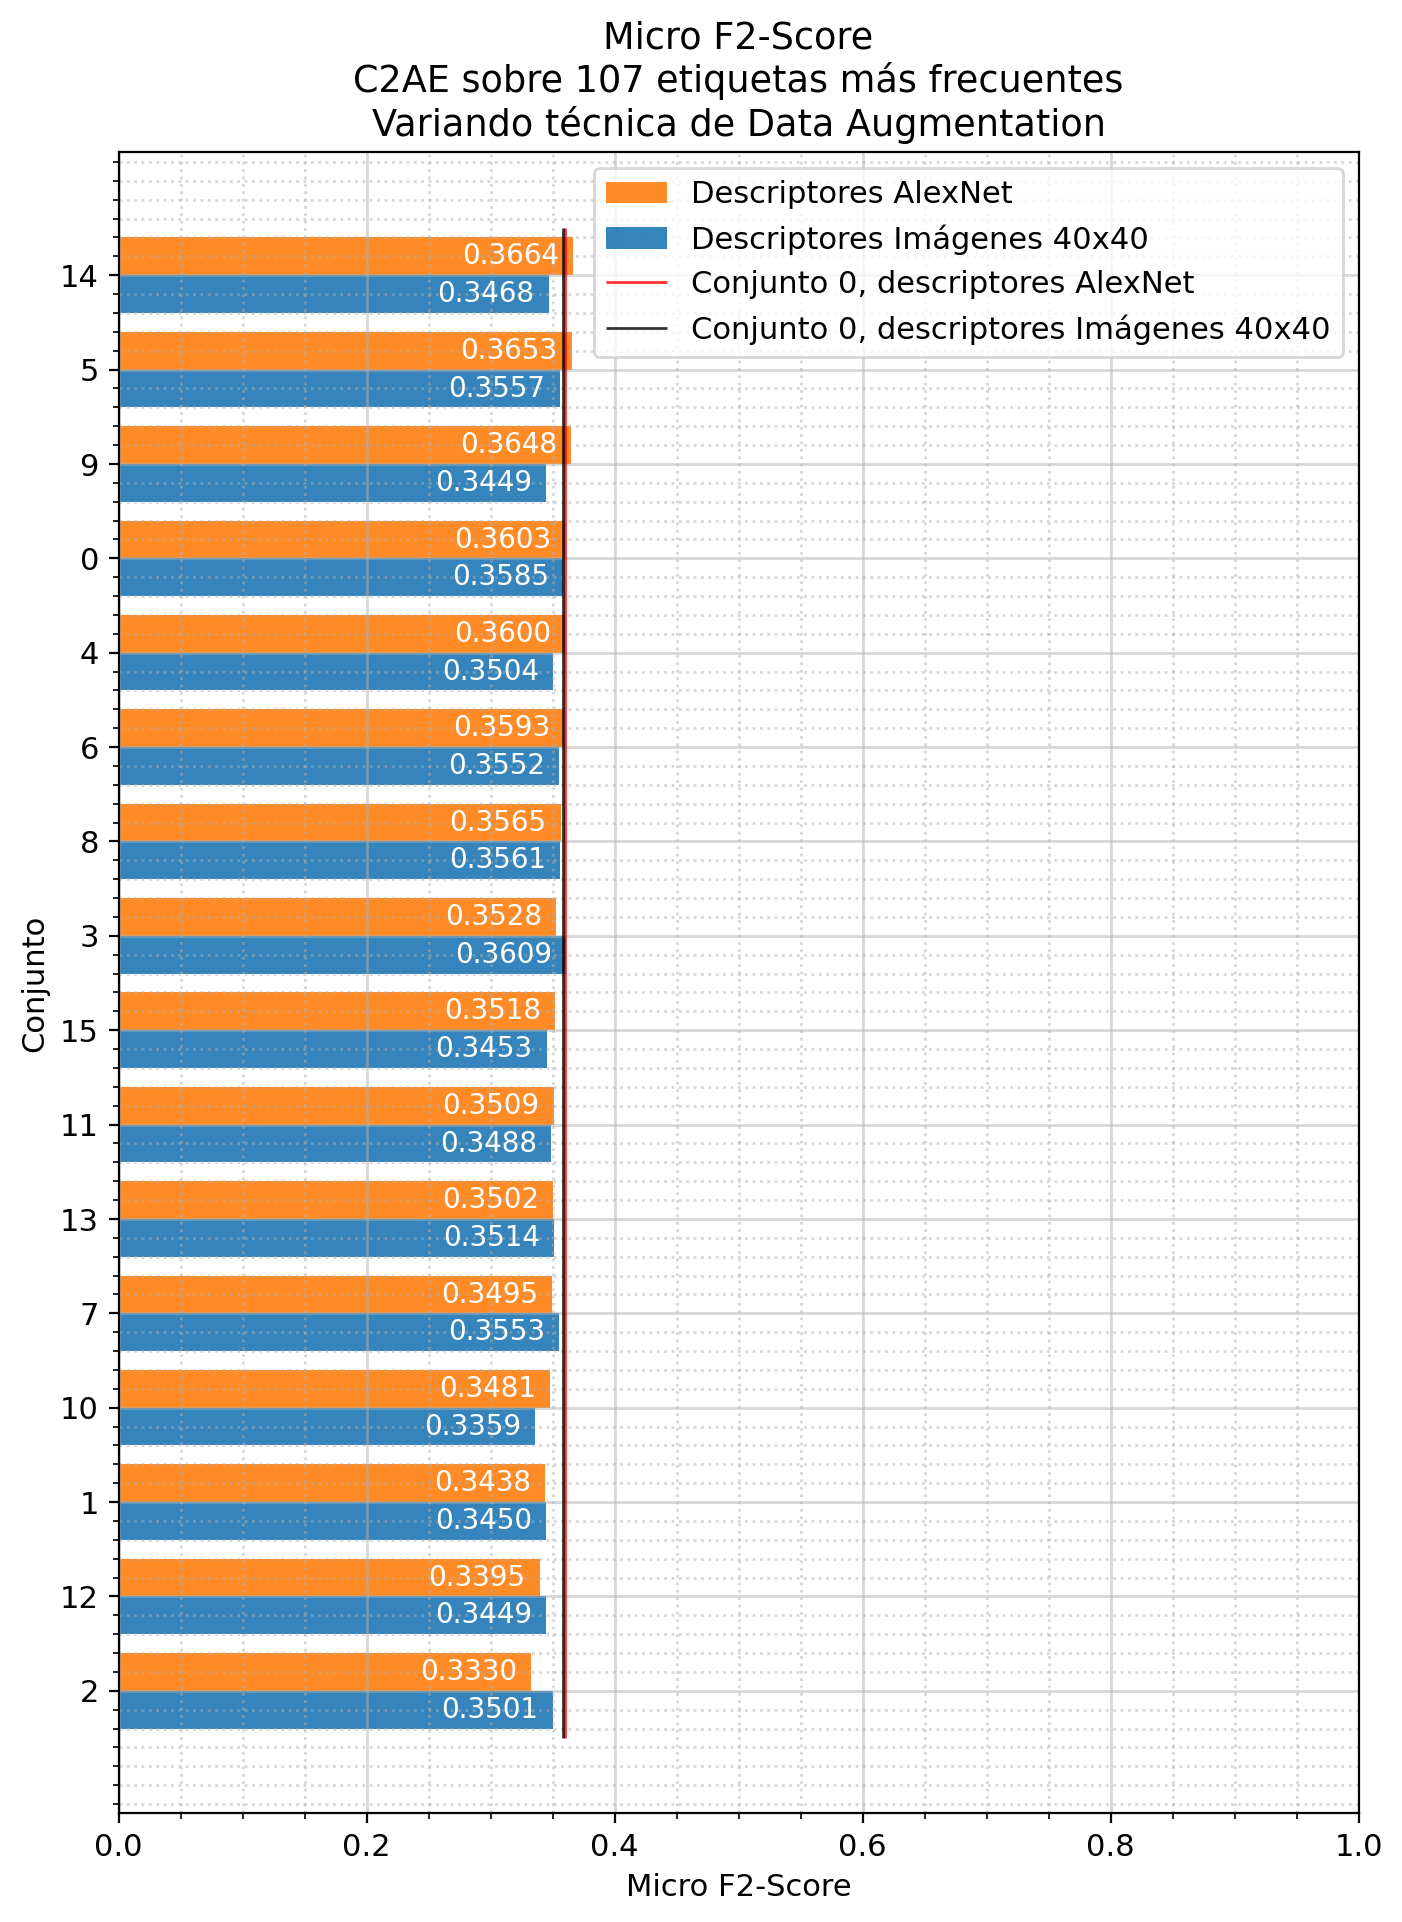

In [6]:
# ordenar 
s_no_pw, s_pw, techsorted = zip(*sorted(zip(scores_alexnet, scores_patterns, techniques)))

for i in range(0, len(techniques)):
    print(techsorted[i], s_pw[i], s_no_pw[i])
    
# wrap de las etiquetas cuando exceden cierto largo
techsorted = ['\n'.join(wrap(l, 22)) for l in techsorted]
x = np.arange(len(techsorted))

fig, ax = plt.subplots()
width = 0.4

b1 = ax.barh(x - width/2, s_pw, width, label = 'Descriptores Imágenes 40x40', color='tab:blue', alpha=0.9)
b2 = ax.barh(x + width/2, s_no_pw, width, label = 'Descriptores AlexNet', color='tab:orange', alpha=0.9)
order = [3, 2, 0, 1]


ax.set_xlabel(target_name)
ax.set_ylabel('Conjunto')

ax.set_title(target_name + '\nC2AE sobre 107 etiquetas más frecuentes\nVariando técnica de Data Augmentation')

# linea horizontal marcando el resultado base no pw
index_base = techsorted.index('0')
plt.vlines(x=s_no_pw[index_base], color='red', linewidth=1, 
           ymin=-0.5, ymax=15.5, label = 'Conjunto 0, descriptores AlexNet',
           alpha=0.8)
plt.vlines(x=s_pw[index_base], color='black', linewidth=1,
           ymin=-0.5, ymax=15.5, label = 'Conjunto 0, descriptores Imágenes 40x40' ,
           alpha=0.8)

# rotar labels del eje x
#plt.xticks(rotation=90)
fig.set_size_inches(8, 11)
fig.set_dpi(200)

ax.grid(which='both')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', alpha=0.5)
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='1', alpha=0.5)

            
# legends en orden deseado
handles, ls = plt.gca().get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[ls[idx] for idx in order])
ax.bar_label(b1, fmt= '%.4f', padding=-40, color='white', size=10)
ax.bar_label(b2, fmt= '%.4f', padding=-40, color='white', size=10)
    
ax.set_yticks(x, techsorted)

ax.set_xlim(0, 1)
plt.show()

